### prophet

In [1]:
import pandas as pd
from prophet import Prophet

/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [3]:
train_data = pd.read_csv('snp_price_phophet_train.csv')
test_data = pd.read_csv('snp_price_phophet_test.csv')

In [4]:
train_data

,ds,stock,y
0,2018-01-03 00:00:00,A,1.025444
1,2018-01-04 00:00:00,A,1.017751
2,2018-01-05 00:00:00,A,1.034024
3,2018-01-08 00:00:00,A,1.036243
4,2018-01-09 00:00:00,A,1.061686
...,...,...,...
547259,2022-04-22 00:00:00,ZTS,2.604193
547260,2022-04-25 00:00:00,ZTS,2.580577
547261,2022-04-26 00:00:00,ZTS,2.532916
547262,2022-04-27 00:00:00,ZTS,2.554385


In [5]:
test_data

,ds,stock,y
0,2022-04-29 00:00:00,A,1.823123
1,2022-05-02 00:00:00,A,1.827709
2,2022-05-03 00:00:00,A,1.870967
3,2022-05-04 00:00:00,A,1.930581
4,2022-05-05 00:00:00,A,1.867146
...,...,...,...
136811,2023-05-23 00:00:00,ZTS,2.492338
136812,2023-05-24 00:00:00,ZTS,2.441386
136813,2023-05-25 00:00:00,ZTS,2.385093
136814,2023-05-26 00:00:00,ZTS,2.377876


In [6]:
prophet_models = {}
for stock in train_data['stock'].unique():
    # Filter data for the specific stock
    df_stock = train_data[train_data['stock'] == stock]

    # Create a new Prophet model for the stock
    model = Prophet()

    # Fit the model to the stock's data
    model.fit(df_stock)

    # Store the fitted model in the dictionary
    prophet_models[stock] = model

11:55:57 - cmdstanpy - INFO - Chain [1] start processing
11:55:58 - cmdstanpy - INFO - Chain [1] done processing
11:55:58 - cmdstanpy - INFO - Chain [1] start processing
11:55:58 - cmdstanpy - INFO - Chain [1] done processing
11:55:58 - cmdstanpy - INFO - Chain [1] start processing
11:55:59 - cmdstanpy - INFO - Chain [1] done processing
11:55:59 - cmdstanpy - INFO - Chain [1] start processing
11:56:00 - cmdstanpy - INFO - Chain [1] done processing
11:56:00 - cmdstanpy - INFO - Chain [1] start processing
11:56:00 - cmdstanpy - INFO - Chain [1] done processing
11:56:00 - cmdstanpy - INFO - Chain [1] start processing
11:56:01 - cmdstanpy - INFO - Chain [1] done processing
11:56:01 - cmdstanpy - INFO - Chain [1] start processing
11:56:02 - cmdstanpy - INFO - Chain [1] done processing
11:56:02 - cmdstanpy - INFO - Chain [1] start processing
11:56:02 - cmdstanpy - INFO - Chain [1] done processing
11:56:03 - cmdstanpy - INFO - Chain [1] start processing
11:56:03 - cmdstanpy - INFO - Chain [1]

In [7]:
stock_list =[]
for x in test_data['stock'].unique():
    stock_list.append(x)

prediction dataframe 

In [8]:
prophet_pred = pd.DataFrame(columns=['ds'] + stock_list)  # Initialize the forecasted values dataframe

for stock in stock_list:
    df_stock_test = test_data[test_data['stock'] == stock]
    model = prophet_models[stock]
    future = model.make_future_dataframe(periods=len(df_stock_test))
    forecast = model.predict(future)
    predicted_values = forecast[['ds', 'yhat']].tail(len(df_stock_test))
    
    # Rename the 'yhat' column to the stock symbol
    predicted_values = predicted_values.rename(columns={'yhat': stock})
    
    prophet_pred = pd.merge(prophet_pred, predicted_values, on='ds', how='outer')  # Merge the predicted values with the main dataframe

prophet_pred['ds'] = pd.to_datetime(prophet_pred['ds'])  # Convert 'ds' column to datetime if not already

# Sort the dataframe based on the 'ds' column
prophet_pred = prophet_pred.sort_values('ds').reset_index(drop=True)

# Print the forecasted values dataframe
print(prophet_pred)


     A_x AAL_x AAP_x AAPL_x ABBV_x ABC_x ABT_x ACGL_x ACN_x ADBE_x  ...  \
0    NaN   NaN   NaN    NaN    NaN   NaN   NaN    NaN   NaN    NaN  ...   
1    NaN   NaN   NaN    NaN    NaN   NaN   NaN    NaN   NaN    NaN  ...   
2    NaN   NaN   NaN    NaN    NaN   NaN   NaN    NaN   NaN    NaN  ...   
3    NaN   NaN   NaN    NaN    NaN   NaN   NaN    NaN   NaN    NaN  ...   
4    NaN   NaN   NaN    NaN    NaN   NaN   NaN    NaN   NaN    NaN  ...   
..   ...   ...   ...    ...    ...   ...   ...    ...   ...    ...  ...   
267  NaN   NaN   NaN    NaN    NaN   NaN   NaN    NaN   NaN    NaN  ...   
268  NaN   NaN   NaN    NaN    NaN   NaN   NaN    NaN   NaN    NaN  ...   
269  NaN   NaN   NaN    NaN    NaN   NaN   NaN    NaN   NaN    NaN  ...   
270  NaN   NaN   NaN    NaN    NaN   NaN   NaN    NaN   NaN    NaN  ...   
271  NaN   NaN   NaN    NaN    NaN   NaN   NaN    NaN   NaN    NaN  ...   

       WYNN_y     XEL_y     XOM_y    XRAY_y     XYL_y     YUM_y     ZBH_y  \
0    0.519746  1.70834

In [9]:
prophet_pred = prophet_pred.loc[:, ~prophet_pred.columns.str.endswith('_x')]

# Rename remaining columns to remove '_y' suffix and keep only stock names
prophet_pred.columns = prophet_pred.columns.str.replace('_y', '')

# Print the modified dataframe
print(prophet_pred)

            ds         A       AAL       AAP      AAPL      ABBV       ABC  \
0   2022-04-29  1.977556  0.301744  2.176896  4.137167  2.006712  1.806538   
1   2022-04-30  1.951938  0.261104  2.165170  4.212221  1.926960  1.736530   
2   2022-05-01  1.951174  0.259805  2.166557  4.214890  1.932725  1.737538   
3   2022-05-02  1.971126  0.299528  2.180363  4.144673  2.022752  1.807990   
4   2022-05-03  1.969958  0.299132  2.186592  4.153666  2.027265  1.809611   
..         ...       ...       ...       ...       ...       ...       ...   
267 2023-01-21  1.928109  0.176870  2.517608  5.196478  2.429723  2.089061   
268 2023-01-22  1.924286  0.176866  2.513704  5.199494  2.432911  2.092544   
269 2023-01-23  1.941241  0.217953  2.522129  5.130015  2.520183  2.165527   
270 2023-01-24  1.937172  0.219007  2.522925  5.140128  2.521804  2.169727   
271 2023-01-25  1.933241  0.218276  2.515912  5.145230  2.525497  2.172903   

          ABT      ACGL       ACN  ...      WYNN       XEL     

In [10]:
prophet_pred.set_index('ds', inplace=True)  # Set 'ds' column as the index
prophet_pred.index.name = 'Date'  # Rename the index to 'Date'

# Print the modified dataframe
print(prophet_pred)

                   A       AAL       AAP      AAPL      ABBV       ABC  \
Date                                                                     
2022-04-29  1.977556  0.301744  2.176896  4.137167  2.006712  1.806538   
2022-04-30  1.951938  0.261104  2.165170  4.212221  1.926960  1.736530   
2022-05-01  1.951174  0.259805  2.166557  4.214890  1.932725  1.737538   
2022-05-02  1.971126  0.299528  2.180363  4.144673  2.022752  1.807990   
2022-05-03  1.969958  0.299132  2.186592  4.153666  2.027265  1.809611   
...              ...       ...       ...       ...       ...       ...   
2023-01-21  1.928109  0.176870  2.517608  5.196478  2.429723  2.089061   
2023-01-22  1.924286  0.176866  2.513704  5.199494  2.432911  2.092544   
2023-01-23  1.941241  0.217953  2.522129  5.130015  2.520183  2.165527   
2023-01-24  1.937172  0.219007  2.522925  5.140128  2.521804  2.169727   
2023-01-25  1.933241  0.218276  2.515912  5.145230  2.525497  2.172903   

                 ABT      ACGL       

now I keep it save for furthur use

In [ ]:
prophet_pred.to_csv('price_prophet_pred.csv',index=True)

### AutoTS

In [2]:
train_data = pd.read_csv('snp_price_AT_train.csv',index_col=0)
test_data = pd.read_csv('snp_price_AT_test.csv',index_col=0)

In [3]:
train_data

,ds,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
0,2018-01-03 00:00:00,1.025444,0.987734,1.009049,0.999826,1.015649,1.003722,1.002211,1.000906,1.004615,...,0.989166,0.993307,1.019640,0.996574,1.012193,0.999142,1.006932,1.019863,0.998817,1.004598
1,2018-01-04 00:00:00,1.017751,0.993961,1.046281,1.004470,1.009856,1.001489,1.000510,1.004643,1.016511,...,0.994522,0.985568,1.021051,0.996425,1.018951,1.009314,1.005481,1.040015,1.002959,1.010590
2,2018-01-05 00:00:00,1.034024,0.993584,1.057404,1.015906,1.027436,1.013611,1.003402,1.000680,1.024896,...,1.001156,0.978666,1.020228,1.010426,1.017041,1.015196,1.015476,1.056214,1.003353,1.022154
3,2018-01-08 00:00:00,1.036243,0.983771,1.049958,1.012133,1.010974,1.030413,1.000510,1.000793,1.033086,...,0.987827,0.985986,1.024815,1.017277,1.020714,1.016912,1.017411,1.066725,0.998422,1.034415
4,2018-01-09 00:00:00,1.061686,0.982827,1.041474,1.012017,1.018596,1.037005,1.002211,0.987882,1.036531,...,0.994522,0.974482,1.020463,0.974828,1.021007,1.014216,1.001048,1.099412,1.021894,1.046538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083,2022-04-22 00:00:00,1.854459,0.390725,2.129008,3.933075,1.948311,1.817675,2.189354,1.607361,2.154221,...,0.473068,1.753641,1.266299,0.631369,1.308077,1.615605,1.077834,3.644586,1.343576,2.604193
1084,2022-04-25 00:00:00,1.856446,0.386853,2.182431,3.959573,1.964779,1.811616,2.196125,1.587656,2.195947,...,0.466670,1.739480,1.223608,0.640311,1.298498,1.600689,1.095926,3.750265,1.351318,2.580577
1085,2022-04-26 00:00:00,1.802793,0.363425,2.178239,3.811770,1.963270,1.797669,2.140494,1.580181,2.100850,...,0.440884,1.731927,1.224055,0.629364,1.248443,1.540236,1.064543,3.611031,1.234967,2.532916
1086,2022-04-27 00:00:00,1.798819,0.367297,2.192277,3.806179,1.981372,1.800069,2.135919,1.628426,2.100850,...,0.439139,1.722250,1.259010,0.621193,1.268527,1.543008,1.053653,3.578343,1.238948,2.554385


In [4]:
test_data

,ds,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
0,2022-04-29 00:00:00,1.823123,0.363425,1.946123,3.832433,1.846364,1.729534,2.076995,1.551642,2.081859,...,0.455490,1.729095,1.268084,0.616568,1.243654,1.544460,1.035389,3.564362,1.250008,2.536923
1,2022-05-02 00:00:00,1.827709,0.359359,1.954507,3.839969,1.858809,1.703013,2.064734,1.558777,2.111247,...,0.463439,1.715170,1.285339,0.611325,1.264201,1.527961,1.034532,3.659917,1.261068,2.499996
2,2022-05-03 00:00:00,1.870967,0.370395,1.948951,3.876919,1.880556,1.723475,2.057414,1.577463,2.112772,...,0.463310,1.702425,1.311816,0.627206,1.272544,1.518853,1.034789,3.549706,1.271244,2.506723
3,2022-05-04 00:00:00,1.930581,0.379882,2.024113,4.035906,1.905571,1.792410,2.117254,1.607361,2.182361,...,0.465055,1.732400,1.364027,0.646787,1.395055,1.563995,1.083150,3.547102,1.315705,2.531341
4,2022-05-05 00:00:00,1.867146,0.358972,1.962696,3.811041,1.912988,1.774119,2.068028,1.578143,2.070353,...,0.442629,1.718002,1.343351,0.629210,1.332950,1.526113,1.050738,3.353100,1.269916,2.453909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,2023-05-23 00:00:00,1.979404,0.272423,1.185566,4.201650,1.861044,1.987738,1.971407,2.485957,2.029067,...,0.659914,1.592851,1.654185,0.595816,1.629442,1.768340,1.126755,2.615177,0.681566,2.492338
268,2023-05-24 00:00:00,1.861692,0.267196,1.169830,4.208507,1.843154,1.985416,1.939712,2.438392,2.020052,...,0.654797,1.581680,1.672686,0.581410,1.581250,1.760537,1.112057,2.520394,0.671826,2.441386
269,2023-05-25 00:00:00,1.838612,0.278426,1.133181,4.236672,1.810117,1.975087,1.904289,2.459117,2.054844,...,0.654344,1.561281,1.642681,0.577965,1.547297,1.752331,1.104967,2.504002,0.656752,2.385093
270,2023-05-26 00:00:00,1.852922,0.277845,1.138562,4.296429,1.796275,1.954659,1.917899,2.412231,2.138232,...,0.655056,1.562009,1.631953,0.578748,1.544000,1.755102,1.103670,2.552502,0.664637,2.377876


In [5]:
train_data.index=pd.to_datetime(train_data.index)
test_data.index=pd.to_datetime(test_data.index)

now I will try to run the model in fast mode

In [6]:
import numpy as np
import pandas as pd
from autots import AutoTS



# Create a new AutoTS model
model = AutoTS(
    forecast_length=len(test_data),
    frequency='infer',
    prediction_interval=0.9,
    ensemble=None,
    model_list="fast",
    transformer_list="fast",
    drop_most_recent=1,
    max_generations=4,
    num_validations=2,
    validation_method="backwards"
)

# Fit the AutoTS model
model = model.fit(train_data)




Inferred frequency is: N
Categorical features converted to numeric
Model Number: 1 with model AverageValueNaive in generation 0 of 4
Model Number: 2 with model AverageValueNaive in generation 0 of 4
Model Number: 3 with model AverageValueNaive in generation 0 of 4
Model Number: 4 with model DatepartRegression in generation 0 of 4
Model Number: 5 with model DatepartRegression in generation 0 of 4


/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  war

Model Number: 6 with model DatepartRegression in generation 0 of 4
Model Number: 7 with model DatepartRegression in generation 0 of 4


2023-07-05 17:37:31.101477: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-05 17:37:31.103192: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-05 17:37:31.135349: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-05 17:37:31.135605: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-05 17:37:31.634930: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

Epoch 1/50


2023-07-05 17:37:32.499785: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-05 17:37:32.500695: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-05 17:37:32.501401: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

26/26 [==============================] - 3s 4ms/step - loss: 0.3677
Epoch 2/50
26/26 [==============================] - 0s 3ms/step - loss: 0.3675
Epoch 3/50
26/26 [==============================] - 0s 2ms/step - loss: 0.3675
Epoch 4/50
26/26 [==============================] - 0s 2ms/step - loss: 0.3674
Epoch 5/50
26/26 [==============================] - 0s 3ms/step - loss: 0.3674
Epoch 6/50
26/26 [==============================] - 0s 3ms/step - loss: 0.3674
Epoch 7/50
26/26 [==============================] - 0s 3ms/step - loss: 0.3674
Epoch 8/50
26/26 [==============================] - 0s 3ms/step - loss: 0.3674
Epoch 9/50
26/26 [==============================] - 0s 3ms/step - loss: 0.3674
Epoch 10/50
26/26 [==============================] - 0s 2ms/step - loss: 0.3674
Epoch 11/50
26/26 [==============================] - 0s 2ms/step - loss: 0.3674
Epoch 12/50
26/26 [==============================] - 0s 2ms/step - loss: 0.3674
Epoch 13/50
26/26 [==============================] - 0s 2ms/

2023-07-05 17:37:39.183569: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-05 17:37:39.184864: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-05 17:37:39.185715: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

9/9 [==============================] - 1s 1ms/step
Model Number: 8 with model ETS in generation 0 of 4
Model Number: 9 with model ETS in generation 0 of 4
Model Number: 10 with model GLM in generation 0 of 4


/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/mehedi/min

Model Number: 11 with model GLM in generation 0 of 4
Model Number: 12 with model GLS in generation 0 of 4
Model Number: 13 with model GLS in generation 0 of 4
Model Number: 14 with model LastValueNaive in generation 0 of 4
Model Number: 15 with model LastValueNaive in generation 0 of 4
Template Eval Error: Exception('Transformer SinTrend failed on fit') in model 15 in generation 0: LastValueNaive
Model Number: 16 with model LastValueNaive in generation 0 of 4
Model Number: 17 with model LastValueNaive in generation 0 of 4
Model Number: 18 with model SeasonalNaive in generation 0 of 4
Template Eval Error: Exception('Transformer SinTrend failed on fit') in model 18 in generation 0: SeasonalNaive
Model Number: 19 with model SeasonalNaive in generation 0 of 4
Model Number: 20 with model SeasonalNaive in generation 0 of 4
Model Number: 21 with model VAR in generation 0 of 4
Template Eval Error: ValueError('maxlags is too large for the number of observations and the number of equations. The 

/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 26 with model ConstantNaive in generation 0 of 4
Model Number: 27 with model DatepartRegression in generation 0 of 4
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 27 in generation 0: DatepartRegression
Model Number: 28 with model SeasonalNaive in generation 0 of 4
Model Number: 29 with model DatepartRegression in generation 0 of 4
Model Number: 30 with model ETS in generation 0 of 4
Model Number: 31 with model VECM in generation 0 of 4
Template Eval Error: ValueError('Model VECM returned NaN for one or more series. fail_on_forecast_nan=True') in model 31 in generation 0: VECM
Model Number: 32 with model MultivariateMotif in generation 0 of 4


/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Template Eval Error: PicklingError('Could not pickle the task to send it to the workers.') in model 32 in generation 0: MultivariateMotif
Model Number: 33 with model MultivariateMotif in generation 0 of 4
Template Eval Error: PicklingError('Could not pickle the task to send it to the workers.') in model 33 in generation 0: MultivariateMotif
Model Number: 34 with model UnivariateMotif in generation 0 of 4
Model Number: 35 with model UnivariateMotif in generation 0 of 4
Model Number: 36 with model SectionalMotif in generation 0 of 4
Model Number: 37 with model SectionalMotif in generation 0 of 4
Model Number: 38 with model SeasonalNaive in generation 0 of 4
Model Number: 39 with model DatepartRegression in generation 0 of 4
Model Number: 40 with model NVAR in generation 0 of 4
Template Eval Error: ValueError('Model NVAR returned NaN for one or more series. fail_on_forecast_nan=True') in model 40 in generation 0: NVAR
Model Number: 41 with model Cassandra in generation 0 of 4
Template Eva

/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: divide by zero encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: invalid value encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/transform.py:3127: RuntimeWarning: invalid value encountered in add
  return df - (self.slope * self.dates_2d + self.intercept)


Template Eval Error: ValueError('Model AverageValueNaive returned NaN for one or more series. fail_on_forecast_nan=True') in model 44 in generation 0: AverageValueNaive
Model Number: 45 with model GLS in generation 0 of 4
Model Number: 46 with model SeasonalNaive in generation 0 of 4
Model Number: 47 with model GLM in generation 0 of 4


/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using defau

Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 47 in generation 0: GLM
Model Number: 48 with model ETS in generation 0 of 4
Model Number: 49 with model VAR in generation 0 of 4
Template Eval Error: LinAlgError('92-th leading minor of the array is not positive definite') in model 49 in generation 0: VAR
Model Number: 50 with model VECM in generation 0 of 4
Template Eval Error: ValueError('Model VECM returned NaN for one or more series. fail_on_forecast_nan=True') in model 50 in generation 0: VECM
Model Number: 51 with model WindowRegression in generation 0 of 4
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 51 in generation 0: WindowRegression
Model Number: 52 with model DatepartRegression in generation 0 of 4
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 52 in generation 0:

/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Template Eval Error: ValueError('Unknown Distance Metric: kulsinski') in model 54 in generation 0: MultivariateMotif
Model Number: 55 with model SectionalMotif in generation 0 of 4
Model Number: 56 with model NVAR in generation 0 of 4
Template Eval Error: ValueError('Model NVAR returned NaN for one or more series. fail_on_forecast_nan=True') in model 56 in generation 0: NVAR
Model Number: 57 with model MAR in generation 0 of 4
Template Eval Error: ValueError('Shape of passed values is (70, 504), indices imply (272, 504)') in model 57 in generation 0: MAR
Model Number: 58 with model RRVAR in generation 0 of 4
Model Number: 59 with model KalmanStateSpace in generation 0 of 4
Model Number: 60 with model MetricMotif in generation 0 of 4
Model Number: 61 with model Cassandra in generation 0 of 4
Template Eval Error: ValueError('seasonality 365.25 creation error') in model 61 in generation 0: Cassandra
Model Number: 62 with model SeasonalityMotif in generation 0 of 4
Model Number: 63 with mo

/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/numpy/core/_methods.py:236: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/numpy/core/_methods.py:247: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


Template Eval Error: Exception('Transformer RegressionFilter failed on fit') in model 67 in generation 0: UnivariateMotif
Model Number: 68 with model WindowRegression in generation 0 of 4
Model Number: 69 with model RRVAR in generation 0 of 4
Model Number: 70 with model KalmanStateSpace in generation 0 of 4
Model Number: 71 with model ETS in generation 0 of 4
Model Number: 72 with model MAR in generation 0 of 4
Template Eval Error: ValueError('Shape of passed values is (70, 504), indices imply (272, 504)') in model 72 in generation 0: MAR
Model Number: 73 with model RRVAR in generation 0 of 4
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 73 in generation 0: RRVAR
Model Number: 74 with model RRVAR in generation 0 of 4
Model Number: 75 with model SectionalMotif in generation 0 of 4
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 75 in generation 0: SectionalMotif
Model Number: 76 with model KalmanStateSpace

/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: divide by zero encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: invalid value encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/mehedi/miniconda3/envs/fa1/lib/python3.9/site-packages/autots/tools/transform.py:3127: RuntimeWarning: invalid value encountered in add
  return df - (self.slope * self.dates_2d + self.intercept)


Template Eval Error: ValueError('more than 1 year of data is required for holiday detection.') in model 77 in generation 0: Cassandra
Model Number: 78 with model ETS in generation 0 of 4
Model Number: 79 with model ETS in generation 0 of 4
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 79 in generation 0: ETS
Model Number: 80 with model ConstantNaive in generation 0 of 4
Model Number: 81 with model GLM in generation 0 of 4
Model Number: 82 with model ETS in generation 0 of 4
Model Number: 83 with model LastValueNaive in generation 0 of 4
Model Number: 84 with model AverageValueNaive in generation 0 of 4
Model Number: 85 with model WindowRegression in generation 0 of 4
Model Number: 86 with model MultivariateMotif in generation 0 of 4


: 

: 

### ETNA

As AUTOTS is crashing the system frequently I am stopping it here and going for ETNA

here I will try for snp490

In [1]:
import pandas as pd 
from etna.datasets import TSDataset
import matplotlib.pyplot as plt
from etna.pipeline import Pipeline
from etna.models import ProphetModel,CatBoostPerSegmentModel
from etna.analysis import plot_backtest
from etna.transforms import LagTransform
from etna.transforms import LinearTrendTransform
from etna.metrics import SMAPE, MAE, MAPE
from etna.analysis import plot_backtest

In [101]:
df=pd.read_csv('snp490.csv',index_col=0)
df

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,67.599998,52.990002,106.089996,43.064999,98.410004,94.040001,58.790001,29.433332,153.839996,177.699997,...,164.300003,47.810001,85.029999,67.139999,68.070000,81.599998,120.446602,103.709999,50.700001,71.769997
2018-01-03,69.320000,52.340000,107.050003,43.057499,99.949997,94.389999,58.919998,29.459999,154.550003,181.039993,...,162.520004,47.490002,86.699997,66.910004,68.900002,81.529999,121.281555,105.769997,50.639999,72.099998
2018-01-04,68.800003,52.669998,111.000000,43.257500,99.379997,94.180000,58.820000,29.570000,156.380005,183.220001,...,163.399994,47.119999,86.820000,66.900002,69.360001,82.360001,121.106796,107.860001,50.849998,72.529999
2018-01-05,69.900002,52.650002,112.180000,43.750000,101.110001,95.320000,58.990002,29.453333,157.669998,185.339996,...,164.490005,46.790001,86.750000,67.839996,69.230003,82.839996,122.310677,109.540001,50.869999,73.360001
2018-01-06,68.905001,52.662500,109.080000,43.282499,99.712500,94.482500,58.880000,29.479166,155.610001,181.824997,...,163.677502,47.302501,86.324999,67.197500,68.890001,82.082499,121.286407,106.719999,50.764999,72.439999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-26,118.370003,16.440001,67.290001,185.270004,134.949997,187.759995,108.510002,71.220001,297.410004,479.510010,...,105.250000,62.860001,104.290001,39.310001,110.669998,134.229996,142.809998,273.109985,27.080000,167.539993
2023-06-27,117.040001,17.350000,68.320000,188.059998,132.600006,188.779999,107.790001,71.139999,300.809998,489.269989,...,105.760002,62.439999,104.550003,39.910000,111.610001,134.279999,144.809998,282.809998,27.299999,170.669998
2023-06-28,116.370003,17.549999,68.080002,189.250000,132.509995,189.720001,107.610001,71.680000,301.720001,482.429993,...,104.250000,61.240002,105.400002,39.580002,110.540001,135.160004,144.000000,283.489990,27.090000,169.100006


for checking the HORIZON from 80-20 split

In [102]:
train_size = 0.8  # 80% of the data for training, 20% for testing

train_index = int(len(df) * train_size)  # Calculate the index to split the data

df_train = df[:train_index]  # Select the first 80% for training
df_test = df[train_index:]  # Select the last 20% for testing
print("Training set shape:", df_train.shape)
print("Testing set shape:", df_test.shape)

Training set shape: (1604, 490)
Testing set shape: (402, 490)


preparing datasets for ETNA

In [103]:
df = df.reset_index()
df_transformed = pd.melt(df, id_vars='Date', var_name='segment', value_name='Value')
df_transformed = df_transformed.rename(columns={'Date': 'timestamp'})
df_transformed = df_transformed.rename(columns={'Value': 'target'})
df = TSDataset.to_dataset(df_transformed)
dataset = TSDataset(df, freq='D')

In [5]:
HORIZON = 402
train_ts, test_ts = dataset.train_test_split(test_size=HORIZON)

In [6]:
HISTORY_LEN = 5 * HORIZON
NUMBER_OF_LAGS = 3   #checked the optimized lag in data_processing file

In [7]:
from etna.pipeline import AutoRegressivePipeline

In [8]:
model = CatBoostPerSegmentModel()
transforms = [
    LinearTrendTransform(in_column="target"),
    LagTransform(in_column="target", lags=[i for i in range(1, 1 + NUMBER_OF_LAGS)], out_column="target_lag"),
]


In [10]:
autoregressivepipeline = AutoRegressivePipeline(model=model, transforms=transforms, horizon=HORIZON, step=1)

In [ ]:
autoregressiv = autoregressivepipeline.fit(train_ts)

In [ ]:
forecast_ts = autoregressiv.forecast()

In [18]:
forecast_ts = forecast_ts.to_pandas()

In [ ]:
forecast_ts.to_csv('catboost_forecast.csv', index=True)

In [9]:
test_ts = test_ts.to_pandas()

In [55]:
test_ts.columns = test_ts.columns.droplevel('feature')

In [68]:
test_ts

segment,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-05-25,120.379997,16.129999,185.309998,140.520004,151.960007,154.270004,113.190002,46.410000,279.640015,402.500000,...,59.720001,75.699997,96.300003,38.580002,81.029999,115.589996,119.150002,322.720001,54.959999,163.029999
2022-05-26,123.849998,17.240000,190.899994,143.779999,150.570007,155.800003,114.870003,47.070000,291.549988,408.600006,...,64.430000,74.959999,96.639999,38.950001,83.930000,117.760002,120.650002,332.470001,56.389999,165.899994
2022-05-27,130.550003,18.129999,193.050003,149.639999,150.000000,156.860001,116.690002,47.459999,304.149994,428.220001,...,65.260002,76.339996,97.589996,39.720001,85.910004,119.769997,119.830002,343.529999,57.040001,172.100006
2022-05-28,124.671429,16.680000,187.241429,141.764287,150.342858,153.181429,114.175715,46.288571,284.042855,405.422860,...,62.201429,75.337143,94.545714,38.417143,82.528571,114.699999,119.195716,329.400003,54.325715,164.038572
2022-05-29,125.050001,16.668333,185.769999,142.500000,150.113335,153.815000,114.465000,46.466667,285.781667,407.263336,...,62.101667,75.391666,95.113333,38.600000,82.625000,115.488332,119.576668,330.283335,54.703334,164.940000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-26,118.370003,16.440001,67.290001,185.270004,134.949997,187.759995,108.510002,71.220001,297.410004,479.510010,...,105.250000,62.860001,104.290001,39.310001,110.669998,134.229996,142.809998,273.109985,27.080000,167.539993
2023-06-27,117.040001,17.350000,68.320000,188.059998,132.600006,188.779999,107.790001,71.139999,300.809998,489.269989,...,105.760002,62.439999,104.550003,39.910000,111.610001,134.279999,144.809998,282.809998,27.299999,170.669998
2023-06-28,116.370003,17.549999,68.080002,189.250000,132.509995,189.720001,107.610001,71.680000,301.720001,482.429993,...,104.250000,61.240002,105.400002,39.580002,110.540001,135.160004,144.000000,283.489990,27.090000,169.100006


In [43]:
forecast_ts = pd.read_csv('catboost_forecast.csv',index_col=0)

In [44]:
test_ts

segment,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
feature,target,target,target,target,target,target,target,target,target,target,...,target,target,target,target,target,target,target,target,target,target
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-05-25,120.379997,16.129999,185.309998,140.520004,151.960007,154.270004,113.190002,46.410000,279.640015,402.500000,...,59.720001,75.699997,96.300003,38.580002,81.029999,115.589996,119.150002,322.720001,54.959999,163.029999
2022-05-26,123.849998,17.240000,190.899994,143.779999,150.570007,155.800003,114.870003,47.070000,291.549988,408.600006,...,64.430000,74.959999,96.639999,38.950001,83.930000,117.760002,120.650002,332.470001,56.389999,165.899994
2022-05-27,130.550003,18.129999,193.050003,149.639999,150.000000,156.860001,116.690002,47.459999,304.149994,428.220001,...,65.260002,76.339996,97.589996,39.720001,85.910004,119.769997,119.830002,343.529999,57.040001,172.100006
2022-05-28,124.671429,16.680000,187.241429,141.764287,150.342858,153.181429,114.175715,46.288571,284.042855,405.422860,...,62.201429,75.337143,94.545714,38.417143,82.528571,114.699999,119.195716,329.400003,54.325715,164.038572
2022-05-29,125.050001,16.668333,185.769999,142.500000,150.113335,153.815000,114.465000,46.466667,285.781667,407.263336,...,62.101667,75.391666,95.113333,38.600000,82.625000,115.488332,119.576668,330.283335,54.703334,164.940000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-26,118.370003,16.440001,67.290001,185.270004,134.949997,187.759995,108.510002,71.220001,297.410004,479.510010,...,105.250000,62.860001,104.290001,39.310001,110.669998,134.229996,142.809998,273.109985,27.080000,167.539993
2023-06-27,117.040001,17.350000,68.320000,188.059998,132.600006,188.779999,107.790001,71.139999,300.809998,489.269989,...,105.760002,62.439999,104.550003,39.910000,111.610001,134.279999,144.809998,282.809998,27.299999,170.669998


In [45]:
forecast_ts

,A,A.1,A.2,A.3,AAL,AAL.1,AAL.2,AAL.3,AAP,AAP.1,...,ZBRA.2,ZBRA.3,ZION,ZION.1,ZION.2,ZION.3,ZTS,ZTS.1,ZTS.2,ZTS.3
segment,,,,,,,,,,,,,,,,,,,,,
feature,target,target_lag_1,target_lag_2,target_lag_3,target,target_lag_1,target_lag_2,target_lag_3,target,target_lag_1,...,target_lag_2,target_lag_3,target,target_lag_1,target_lag_2,target_lag_3,target,target_lag_1,target_lag_2,target_lag_3
timestamp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-25,123.23667819586912,-24.070899917990403,-22.438192955964837,-26.50882207385466,15.53972467361697,5.47514837958564,6.70465558610886,6.742495871652263,186.46770269617986,-28.47146419835687,...,-188.89992143983204,-192.2381612407192,53.33298965559095,-0.2103886340310268,0.5553110338362046,-0.6656524808730637,163.63762833406776,-46.70256287185322,-46.66233869693468,-46.68711187715934
2022-05-26,123.58304158449677,-25.306932651432007,-24.070899917990403,-22.438192955964837,15.90941116592018,5.535365846679394,5.47514837958564,6.70465558610886,188.1192232108986,-22.288665374482378,...,-201.03170320470008,-188.89992143983204,53.63477729142651,-0.4231012403014489,-0.2103886340310268,0.5553110338362046,163.7278555607441,-46.20516481621968,-46.70256287185322,-46.66233869693468
2022-05-27,124.54608193778633,-25.023276530005703,-25.306932651432007,-24.070899917990403,15.870788891319444,5.9255451324593835,5.535365846679394,5.47514837958564,185.0514079809803,-20.692053004529924,...,-190.8679472097769,-201.03170320470008,53.61618774460552,-0.12701495079991076,-0.4231012403014489,-0.2103886340310268,163.81808278742048,-46.20516481621968,-46.20516481621968,-46.70256287185322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-26,149.873783526815,-23.564612399420383,-23.564612399420383,-23.564612399420383,7.447282971400184,5.57856315474466,5.57856315474466,5.57856315474466,207.01371708578253,-23.891854269446895,...,-190.8679472097769,-190.8679472097769,57.2972457147239,1.2933296601371396,1.2777203242225852,1.2933296601371396,199.45783732458645,-46.20516481621968,-46.20516481621968,-46.20516481621968
2023-06-27,149.93649079401635,-23.564612399420383,-23.564612399420383,-23.564612399420383,7.426790177923404,5.57856315474466,5.57856315474466,5.57856315474466,207.84046747420246,-23.541184457109665,...,-190.8679472097769,-190.8679472097769,57.318556396972475,1.2777203242225852,1.2933296601371396,1.2777203242225852,199.54806455126283,-46.20516481621968,-46.20516481621968,-46.20516481621968
2023-06-28,149.9991980612177,-23.564612399420383,-23.564612399420383,-23.564612399420383,7.40629738444662,5.57856315474466,5.57856315474466,5.57856315474466,207.96327103250388,-22.76934221345607,...,-190.8679472097769,-190.8679472097769,57.30864840739195,1.2933296601371396,1.2777203242225852,1.2933296601371396,199.63829177793917,-46.20516481621968,-46.20516481621968,-46.20516481621968


In [46]:
columns_to_delete = [col for col in forecast_ts.columns if col.endswith(('.1', '.2', '.3'))]
forecast_ts = forecast_ts.drop(columns=columns_to_delete)

In [47]:
forecast_ts

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
segment,,,,,,,,,,,,,,,,,,,,,
feature,target,target,target,target,target,target,target,target,target,target,...,target,target,target,target,target,target,target,target,target,target
timestamp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-25,123.23667819586912,15.53972467361697,186.46770269617986,140.90707459091448,151.4273401453814,151.16866470123387,110.25897516084005,46.25399789008671,281.7339159515805,398.6354963092832,...,59.24245507882259,76.91278941614863,90.57509371912815,38.16552546898769,81.8497537573611,113.55217892802425,118.71235753017653,333.3255365390882,53.33298965559095,163.63762833406776
2022-05-26,123.58304158449677,15.90941116592018,188.1192232108986,142.1528667212572,151.3165009042066,149.14880715776016,111.67472825105196,46.356600915391915,282.0973755693243,397.59258186595537,...,60.437625714898324,76.42123611077933,90.7019997808168,38.14993329953137,81.40477056629763,112.91228077097053,118.86246672449116,333.6073122004406,53.63477729142651,163.7278555607441
2022-05-27,124.54608193778633,15.870788891319444,185.0514079809803,141.97939234446386,151.22027731330292,149.44522781345316,113.84637817982603,46.395901900340746,280.91703281867586,400.6836840743829,...,59.21201028358048,76.38122522363412,85.77747943594967,38.30248023830787,81.43437620775016,112.2521396441238,119.66810997352621,333.88908786179303,53.61618774460552,163.81808278742048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-26,149.873783526815,7.447282971400184,207.01371708578253,177.836531613186,165.33367706096172,166.31059761729057,131.31941676637229,50.50526431707125,340.7194190673836,502.7694450883175,...,43.29459248627676,84.02194934561952,81.63512237452773,40.61422159428599,93.12860458150016,123.4632683670132,126.8958845740083,445.1904740960052,57.2972457147239,199.45783732458645
2023-06-27,149.93649079401635,7.426790177923404,207.84046747420246,178.29897390714547,163.54113730968842,167.05139989355354,132.84224430057418,50.45381740787912,340.85454823451255,503.0278900529098,...,43.24525521677615,84.03918552416859,81.62108979745446,40.620074104047966,93.15821022295269,122.7915313043715,127.37320080424692,445.4722497573576,57.318556396972475,199.54806455126283
2023-06-28,149.9991980612177,7.40629738444662,207.96327103250388,177.18397541755317,163.69363463719156,166.67087868305018,131.92095468507404,50.257859640052715,340.98967740164153,503.286335017502,...,43.19591794727555,84.05642170271767,81.6070572203812,40.62592661380993,93.18781586440522,123.65389945589646,127.83645983367524,445.75402541871,57.30864840739195,199.63829177793917


In [67]:
forecast_ts.index

Index(['2022-05-25', '2022-05-26', '2022-05-27', '2022-05-28', '2022-05-29',
       '2022-05-30', '2022-05-31', '2022-06-01', '2022-06-02', '2022-06-03',
       ...
       '2023-06-21', '2023-06-22', '2023-06-23', '2023-06-24', '2023-06-25',
       '2023-06-26', '2023-06-27', '2023-06-28', '2023-06-29', '2023-06-30'],
      dtype='object', name='segment', length=402)

In [49]:
forecast_ts = forecast_ts[1:]

In [57]:
forecast_ts = forecast_ts[1:]

In [66]:
forecast_ts

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
segment,,,,,,,,,,,,,,,,,,,,,
2022-05-25,123.236678,15.539725,186.467703,140.907075,151.427340,151.168665,110.258975,46.253998,281.733916,398.635496,...,59.242455,76.912789,90.575094,38.165525,81.849754,113.552179,118.712358,333.325537,53.332990,163.637628
2022-05-26,123.583042,15.909411,188.119223,142.152867,151.316501,149.148807,111.674728,46.356601,282.097376,397.592582,...,60.437626,76.421236,90.702000,38.149933,81.404771,112.912281,118.862467,333.607312,53.634777,163.727856
2022-05-27,124.546082,15.870789,185.051408,141.979392,151.220277,149.445228,113.846378,46.395902,280.917033,400.683684,...,59.212010,76.381225,85.777479,38.302480,81.434376,112.252140,119.668110,333.889088,53.616188,163.818083
2022-05-28,125.013884,15.774571,185.890368,141.000100,152.453003,150.289217,112.925089,46.407236,283.327093,400.942129,...,60.269351,76.581250,88.068350,38.308333,81.463982,113.114508,120.204436,334.170864,53.849343,163.908310
2022-05-29,125.145452,15.592610,186.700013,140.862859,153.354814,150.966956,110.037224,46.427948,283.608137,401.200574,...,60.502519,76.650306,86.280064,38.314185,81.493587,113.582337,120.511599,334.452639,53.797234,163.998537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-26,149.873784,7.447283,207.013717,177.836532,165.333677,166.310598,131.319417,50.505264,340.719419,502.769445,...,43.294592,84.021949,81.635122,40.614222,93.128605,123.463268,126.895885,445.190474,57.297246,199.457837
2023-06-27,149.936491,7.426790,207.840467,178.298974,163.541137,167.051400,132.842244,50.453817,340.854548,503.027890,...,43.245255,84.039186,81.621090,40.620074,93.158210,122.791531,127.373201,445.472250,57.318556,199.548065
2023-06-28,149.999198,7.406297,207.963271,177.183975,163.693635,166.670879,131.920955,50.257860,340.989677,503.286335,...,43.195918,84.056422,81.607057,40.625927,93.187816,123.653899,127.836460,445.754025,57.308648,199.638292


In [64]:
forecast_ts.to_csv('catboost_forecast.csv', index=True)

In [65]:
forecast_ts = pd.read_csv('catboost_forecast.csv',index_col=0)

comparisons

In [70]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

# Assuming your DataFrames are named test_ts and forecast_ts
assets = test_ts.columns  # Get the list of asset names

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
scaled_test_ts = pd.DataFrame(scaler.fit_transform(test_ts), columns=test_ts.columns, index=test_ts.index)
scaled_forecast_ts = pd.DataFrame(scaler.transform(forecast_ts), columns=forecast_ts.columns, index=forecast_ts.index)

In [77]:
scaled_forecast_ts.index=pd.to_datetime(scaled_forecast_ts.index)

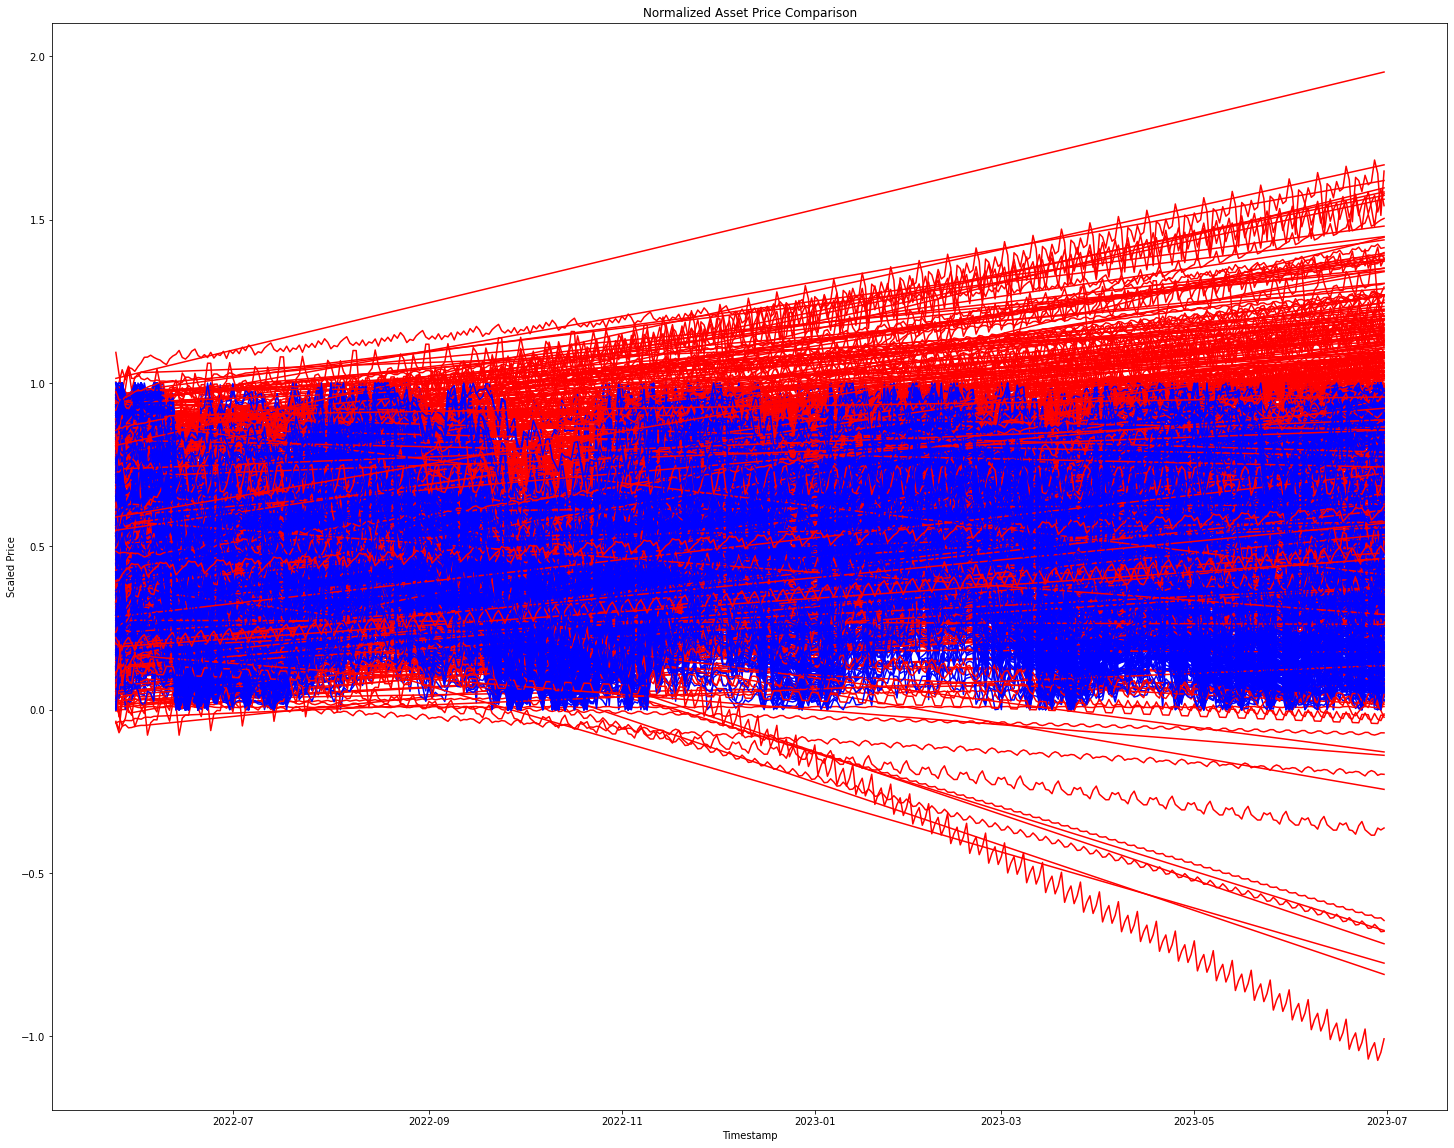

In [85]:
plt.figure(figsize=(25, 20))  # Set the figure size

# Plot the assets' prices
for asset in assets:
    plt.plot(scaled_test_ts.index, scaled_test_ts[asset], color='blue', label='Test')
    plt.plot(scaled_forecast_ts.index, scaled_forecast_ts[asset], color='red', label='Forecast')

plt.xlabel('Timestamp')
plt.ylabel('Scaled Price')
plt.title('Normalized Asset Price Comparison')
plt.show()


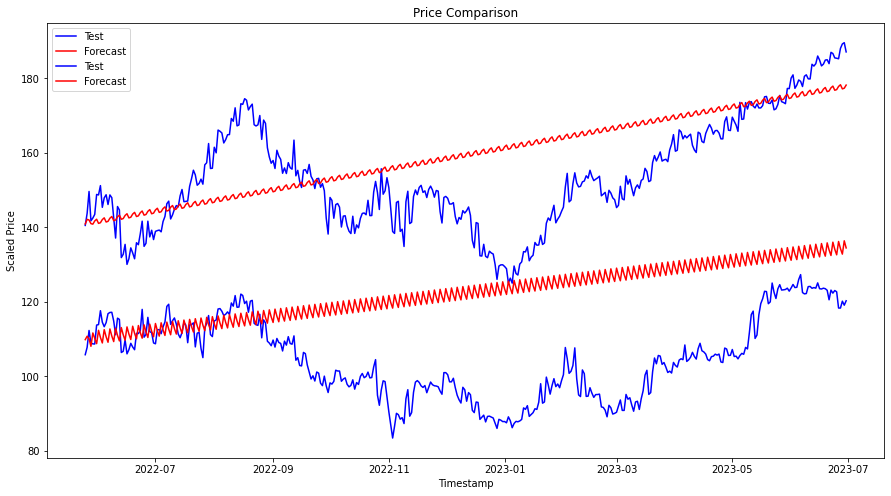

In [100]:
assets = test_ts[['AAPL','GOOGL']]
plt.figure(figsize=(15, 8))  # Set the figure size

# Plot the assets' prices
for asset in assets:
    plt.plot(test_ts.index, test_ts[asset], color='blue', label='Test')
    plt.plot(forecast_ts.index, forecast_ts[asset], color='red', label='Forecast')

plt.xlabel('Timestamp')
plt.ylabel('Scaled Price')
plt.title('Price Comparison')
plt.legend()
plt.show()

In [86]:
forecast_ts.index = pd.to_datetime(forecast_ts.index)

In [90]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE and RMSE for each stock
mae_list = []
rmse_list = []

for column in scaled_test_ts.columns:
    mae = mean_absolute_error(scaled_test_ts[column], scaled_forecast_ts[column])
    rmse = mean_squared_error(scaled_test_ts[column], scaled_forecast_ts[column], squared=False)
    mae_list.append(mae)
    rmse_list.append(rmse)

# Create performance_df
performance_df = pd.DataFrame({'Stock': scaled_test_ts.columns, 'MAE': mae_list, 'RMSE': rmse_list})

# Display the performance_df
print(performance_df)


    Stock       MAE      RMSE
0       A  0.225615  0.287025
1     AAL  0.526850  0.670267
2     AAP  0.323238  0.415208
3    AAPL  0.174361  0.217417
4    ABBV  0.308017  0.380855
..    ...       ...       ...
485   YUM  0.206873  0.237516
486   ZBH  0.181349  0.226648
487  ZBRA  0.758708  0.843624
488  ZION  0.281356  0.401521
489   ZTS  0.375637  0.422752

[490 rows x 3 columns]


In [91]:
performance_df.to_csv('ETNA_catboost_pred.csv',index=False)

In [92]:
auto=pd.read_csv('prophet_pred.csv',index_col=0)
pro=pd.read_csv('AT_pred.csv',index_col=0)
ETNA = pd.read_csv('ETNA_pred.csv',index_col=0)
ETNA_cat = pd.read_csv('ETNA_catboost_pred.csv',index_col=0)

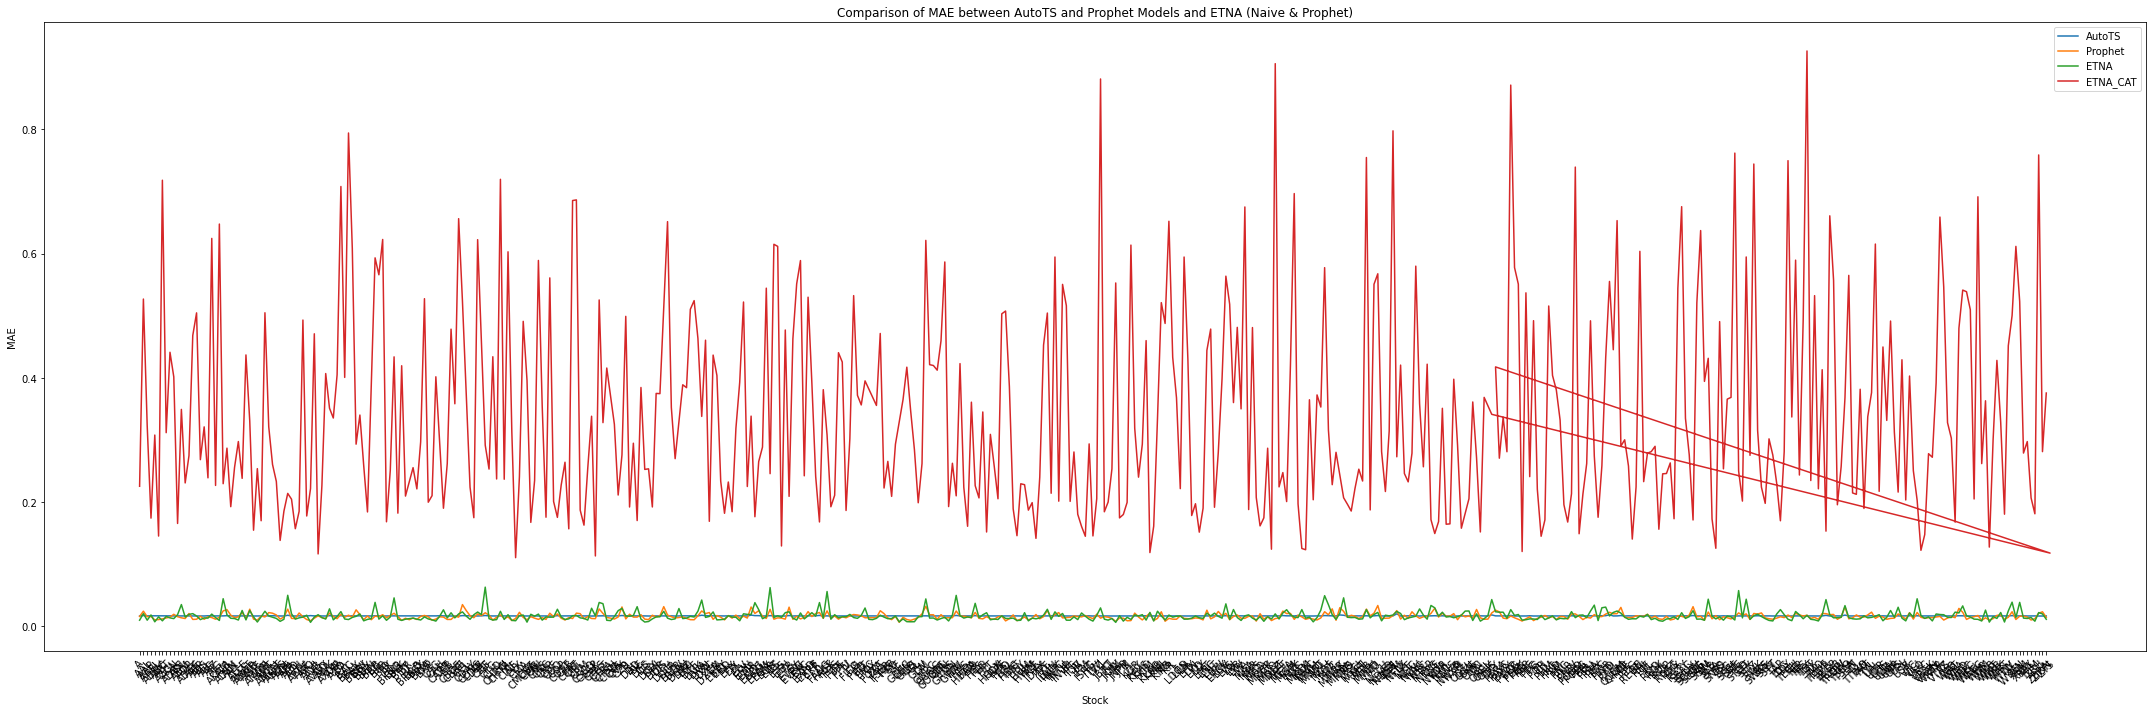

In [93]:
# Plotting MAE
plt.figure(figsize=(30, 10))
plt.plot(auto['MAE'], label='AutoTS')
plt.plot(pro['MAE'], label='Prophet')
plt.plot(ETNA['MAE'], label='ETNA')
plt.plot(ETNA_cat['MAE'], label='ETNA_CAT')
plt.xlabel('Stock')
plt.ylabel('MAE')
plt.title('Comparison of MAE between AutoTS and Prophet Models and ETNA (Naive & Prophet)')
plt.legend()
plt.xticks(range(len(auto['MAE'])), rotation=45)
plt.tight_layout()
plt.show()

so, ETNA_cat is performing worst

lets try out prophet of ETNA

In [111]:
HORIZON = 402
train_ts, test_ts = dataset.train_test_split(test_size=HORIZON)

In [112]:
import pandas as pd
import matplotlib.pyplot as plt

from etna.datasets.tsdataset import TSDataset
from etna.metrics import MAE
from etna.metrics import MSE
from etna.metrics import SMAPE
from etna.pipeline import Pipeline
from etna.models import ProphetModel,NaiveModel
from etna.analysis import plot_backtest
model = ProphetModel()  # Create a model
transforms = []  # A list of transforms -  we will not use any of them
pipeline = Pipeline(model=model, transforms=transforms, horizon=HORIZON)


In [106]:
pipeline.fit(train_ts)

14:32:13 - cmdstanpy - INFO - Chain [1] start processing
14:32:13 - cmdstanpy - INFO - Chain [1] done processing
14:32:13 - cmdstanpy - INFO - Chain [1] start processing
14:32:13 - cmdstanpy - INFO - Chain [1] done processing
14:32:13 - cmdstanpy - INFO - Chain [1] start processing
14:32:14 - cmdstanpy - INFO - Chain [1] done processing
14:32:14 - cmdstanpy - INFO - Chain [1] start processing
14:32:14 - cmdstanpy - INFO - Chain [1] done processing
14:32:14 - cmdstanpy - INFO - Chain [1] start processing
14:32:14 - cmdstanpy - INFO - Chain [1] done processing
14:32:14 - cmdstanpy - INFO - Chain [1] start processing
14:32:15 - cmdstanpy - INFO - Chain [1] done processing
14:32:15 - cmdstanpy - INFO - Chain [1] start processing
14:32:15 - cmdstanpy - INFO - Chain [1] done processing
14:32:15 - cmdstanpy - INFO - Chain [1] start processing
14:32:16 - cmdstanpy - INFO - Chain [1] done processing
14:32:16 - cmdstanpy - INFO - Chain [1] start processing
14:32:16 - cmdstanpy - INFO - Chain [1]

Pipeline(model = ProphetModel(growth = 'linear', changepoints = None, n_changepoints = 25, changepoint_range = 0.8, yearly_seasonality = 'auto', weekly_seasonality = 'auto', daily_seasonality = 'auto', holidays = None, seasonality_mode = 'additive', seasonality_prior_scale = 10.0, holidays_prior_scale = 10.0, changepoint_prior_scale = 0.05, mcmc_samples = 0, interval_width = 0.8, uncertainty_samples = 1000, stan_backend = None, additional_seasonality_params = (), ), transforms = [], horizon = 402, )

In [107]:
forecast_ts = pipeline.forecast()

/home/mehedi/anaconda3/envs/fa1/lib/python3.9/site-packages/etna/datasets/tsdataset.py:279: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(


In [108]:
test_ts = test_ts.to_pandas()
forecast_ts = forecast_ts.to_pandas()

In [109]:
test_ts.columns = test_ts.columns.droplevel('feature')
forecast_ts.columns = forecast_ts.columns.droplevel('feature')

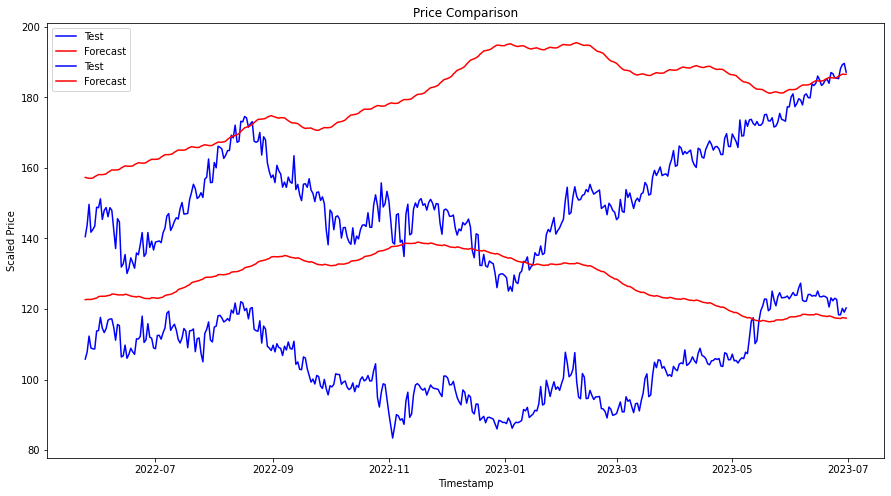

In [110]:
assets = test_ts[['AAPL','GOOGL']]
plt.figure(figsize=(15, 8))  # Set the figure size

# Plot the assets' prices
for asset in assets:
    plt.plot(test_ts.index, test_ts[asset], color='blue', label='Test')
    plt.plot(forecast_ts.index, forecast_ts[asset], color='red', label='Forecast')

plt.xlabel('Timestamp')
plt.ylabel('Scaled Price')
plt.title('Price Comparison')
plt.legend()
plt.show()

these also not so good

In [113]:
model =NaiveModel(lag=3)  # Create a model
transforms = []  # A list of transforms -  we will not use any of them
pipeline = Pipeline(model=model, transforms=transforms, horizon=HORIZON)
pipeline.fit(train_ts)

Pipeline(model = NaiveModel(lag = 3, ), transforms = [], horizon = 402, )

In [114]:
forecast_ts = pipeline.forecast()

/home/mehedi/anaconda3/envs/fa1/lib/python3.9/site-packages/etna/datasets/tsdataset.py:279: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(


In [115]:
test_ts = test_ts.to_pandas()
forecast_ts = forecast_ts.to_pandas()
test_ts.columns = test_ts.columns.droplevel('feature')
forecast_ts.columns = forecast_ts.columns.droplevel('feature')

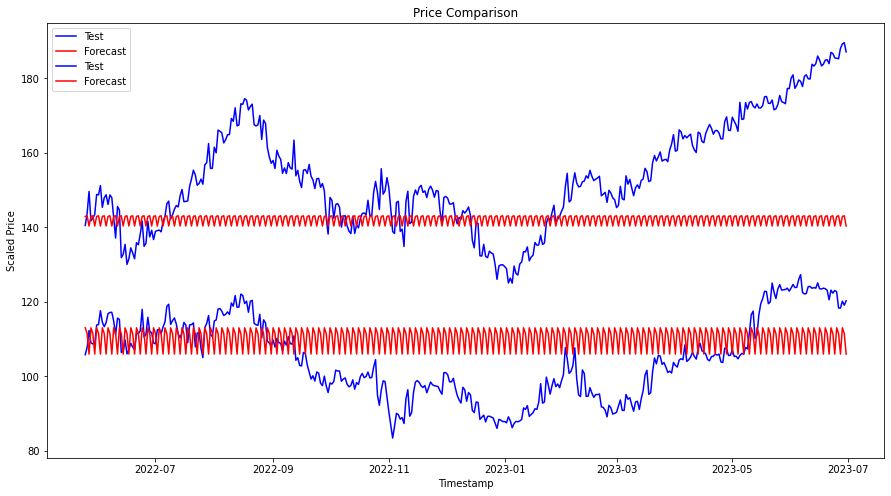

In [116]:
assets = test_ts[['AAPL','GOOGL']]
plt.figure(figsize=(15, 8))  # Set the figure size

# Plot the assets' prices
for asset in assets:
    plt.plot(test_ts.index, test_ts[asset], color='blue', label='Test')
    plt.plot(forecast_ts.index, forecast_ts[asset], color='red', label='Forecast')

plt.xlabel('Timestamp')
plt.ylabel('Scaled Price')
plt.title('Price Comparison')
plt.legend()
plt.show()

again worst